# 🧪 Missing Value Strategy Experiment
## 결측치 처리 전략 비교 실험

**Date:** 2025-11-13

**목표:**
1. Pattern-Based vs Smart-Fill vs Backfill 전략 비교
2. 각 전략의 결측치 예측 품질 평가
3. 실제값과 채운값의 gap 측정
4. 최종 추천 전략 선정

**전략:**
- `pattern_based`: 유사 패턴 feature로 선형 회귀 예측 (NEW)
- `smart_fill`: 그룹별 지능형 채움 (M/V/S=median, E/I/P=backfill)
- `backfill`: 단순 backfill (baseline)

## 1. Setup

In [1]:
# Standard libraries
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Get project root
notebook_dir = os.getcwd() if '__file__' not in dir() else os.path.dirname(os.path.abspath(__file__))
project_root = os.path.dirname(notebook_dir) if 'notebooks' in notebook_dir else notebook_dir
sys.path.insert(0, project_root)

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Project utilities
from src.data import DataLoader
from src.utils import set_seed, load_config

# Load configuration
os.chdir(project_root)
config_path = os.path.join(project_root, 'conf', 'params.yaml')
config = load_config(config_path)
set_seed(config['seed'])

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (16, 6)

print('✅ Setup complete!')
print(f'📂 Working directory: {os.getcwd()}')

✅ Setup complete!
📂 Working directory: /Users/gimjunseog/projects/kaggle/Prediction_Market


## 2. Load Original Data

In [2]:
# Initialize DataLoader
loader = DataLoader()

# Load original data (with missing values)
train_df, test_df = loader.load_data()

print(f'📦 Train: {train_df.shape}, Test: {test_df.shape}')
print(f'📅 Date range: {train_df["date_id"].min()} - {train_df["date_id"].max()}')

# Get missing summary
missing_summary = loader.get_missing_summary(train_df)
print(f'\n📊 Features with missing values: {len(missing_summary)}')
print(f'Total missing cells: {missing_summary["missing_count"].sum()}')

display(missing_summary.head(10))

2025-11-13 09:50:38,528 - prediction_market - INFO - Starting: Loading data
2025-11-13 09:50:38,529 - prediction_market - INFO - Loading train data from data/raw/train.csv
2025-11-13 09:50:38,625 - prediction_market - INFO - Loading test data from data/raw/test.csv
2025-11-13 09:50:38,628 - prediction_market - INFO - Feature groups identified:
2025-11-13 09:50:38,628 - prediction_market - INFO -   M: 18 features
2025-11-13 09:50:38,628 - prediction_market - INFO -   E: 20 features
2025-11-13 09:50:38,629 - prediction_market - INFO -   I: 9 features
2025-11-13 09:50:38,629 - prediction_market - INFO -   P: 13 features
2025-11-13 09:50:38,629 - prediction_market - INFO -   V: 13 features
2025-11-13 09:50:38,630 - prediction_market - INFO -   S: 12 features
2025-11-13 09:50:38,630 - prediction_market - INFO -   D: 9 features
2025-11-13 09:50:38,635 - prediction_market - INFO - Data loaded and sorted by date_id
2025-11-13 09:50:38,635 - prediction_market - INFO - Completed: Loading data - 

📦 Train: (9021, 98), Test: (10, 99)
📅 Date range: 0 - 9020

📊 Features with missing values: 85
Total missing cells: 137675


,feature,group,missing_count,missing_pct,first_valid_idx,last_valid_idx
35,E7,E,6969,77.253076,6969,9020
61,V10,V,6049,67.054650,6049,9020
78,S3,S,5733,63.551713,5733,9020
0,M1,M,5547,61.489857,5547,9020
4,M13,M,5540,61.412260,5540,9020
5,M14,M,5540,61.412260,5540,9020
14,M6,M,5043,55.902893,5043,9020
72,V9,V,4539,50.315929,4539,9020
76,S12,S,3537,39.208513,3537,9020
13,M5,M,3283,36.392861,3283,9020


## 3. Strategy Comparison Experiment

In [3]:
# Define strategies to test
strategies = {
    'pattern_based': '유사 패턴 활용 (Pattern-Based Imputation)',
    'smart_fill': '그룹별 지능형 채움 (Group-Specific Fill)',
    'backfill': '단순 Backfill (Baseline)'
}

# Store processed dataframes
processed_dfs = {}
results = []

print("="*80)
print("MISSING VALUE STRATEGY COMPARISON EXPERIMENT")
print("="*80)

for strategy_name, description in strategies.items():
    print(f"\n{'='*80}")
    print(f"Testing: {description}")
    print(f"Strategy: {strategy_name}")
    print(f"{'='*80}")
    
    # Process data with this strategy
    train_processed = loader.handle_missing_values(
        train_df.copy(), 
        strategy=strategy_name
    )
    
    # Store processed dataframe
    processed_dfs[strategy_name] = train_processed
    
    # Check remaining missing values
    remaining = train_processed.isnull().sum().sum()
    print(f"\n✅ Remaining missing values: {remaining}")
    
    results.append({
        'strategy': strategy_name,
        'description': description,
        'remaining_missing': remaining
    })

# Results summary
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("STRATEGY COMPARISON SUMMARY")
print("="*80)
display(results_df)

MISSING VALUE STRATEGY COMPARISON EXPERIMENT

Testing: 유사 패턴 활용 (Pattern-Based Imputation)
Strategy: pattern_based


2025-11-13 09:52:05,135 - prediction_market - INFO - Starting pattern-based imputation...
2025-11-13 09:52:05,504 - prediction_market - INFO - Pattern-based imputation complete
2025-11-13 09:52:05,507 - prediction_market - INFO - Remaining missing values: 0
2025-11-13 09:52:05,528 - prediction_market - INFO - Missing values handled (smart_fill: group-specific strategies)
2025-11-13 09:52:05,531 - prediction_market - INFO - Remaining missing values: 0
2025-11-13 09:52:05,546 - prediction_market - INFO - Missing values handled (backfill: simple backfill + median)
2025-11-13 09:52:05,548 - prediction_market - INFO - Remaining missing values: 0



✅ Remaining missing values: 0

Testing: 그룹별 지능형 채움 (Group-Specific Fill)
Strategy: smart_fill

✅ Remaining missing values: 0

Testing: 단순 Backfill (Baseline)
Strategy: backfill

✅ Remaining missing values: 0

STRATEGY COMPARISON SUMMARY


,strategy,description,remaining_missing
0,pattern_based,유사 패턴 활용 (Pattern-Based Imputation),0
1,smart_fill,그룹별 지능형 채움 (Group-Specific Fill),0
2,backfill,단순 Backfill (Baseline),0


## 4. Quality Assessment: Gap from First Valid Value

각 전략이 채운 값이 실제 첫 유효값과 얼마나 가까운지 측정

In [4]:
# Select features with high missing % for detailed analysis
test_features = missing_summary.nlargest(10, 'missing_pct')['feature'].tolist()

print("="*80)
print("IMPUTATION QUALITY ASSESSMENT")
print("="*80)
print(f"\nAnalyzing top 10 features with highest missing %:\n")

quality_results = []

for feature in test_features:
    # Get first valid index from original data
    first_valid_idx = train_df[feature].first_valid_index()
    
    if first_valid_idx is None or first_valid_idx == 0:
        continue
    
    # Actual first valid value
    actual_value = train_df.loc[first_valid_idx, feature]
    
    print(f"\n{'─'*80}")
    print(f"Feature: {feature}")
    print(f"First valid index: {first_valid_idx}")
    print(f"Actual first value: {actual_value:.6f}")
    print(f"{'─'*80}")
    
    for strategy_name in strategies.keys():
        # Get filled values (before first valid index)
        filled_period = processed_dfs[strategy_name].loc[:first_valid_idx-1, feature]
        
        if len(filled_period) > 0 and not filled_period.isna().all():
            # Calculate metrics
            mean_filled = filled_period.mean()
            std_filled = filled_period.std()
            gap = abs(mean_filled - actual_value)
            gap_pct = (gap / abs(actual_value) * 100) if actual_value != 0 else np.nan
            
            print(f"  {strategy_name:15s}: Mean={mean_filled:10.6f}, Gap={gap:8.6f} ({gap_pct:6.2f}%)")
            
            quality_results.append({
                'feature': feature,
                'strategy': strategy_name,
                'actual_value': actual_value,
                'mean_filled': mean_filled,
                'std_filled': std_filled,
                'gap': gap,
                'gap_pct': gap_pct
            })

# Convert to DataFrame
quality_df = pd.DataFrame(quality_results)

# Aggregate by strategy
print("\n" + "="*80)
print("AVERAGE GAP BY STRATEGY")
print("="*80)

strategy_quality = quality_df.groupby('strategy').agg({
    'gap': ['mean', 'median', 'std'],
    'gap_pct': ['mean', 'median']
}).round(4)

display(strategy_quality)

IMPUTATION QUALITY ASSESSMENT

Analyzing top 10 features with highest missing %:


────────────────────────────────────────────────────────────────────────────────
Feature: E7
First valid index: 6969
Actual first value: 1.036085
────────────────────────────────────────────────────────────────────────────────
  pattern_based  : Mean=  1.036085, Gap=0.000000 (  0.00%)
  smart_fill     : Mean=  1.036085, Gap=0.000000 (  0.00%)
  backfill       : Mean=  1.036085, Gap=0.000000 (  0.00%)

────────────────────────────────────────────────────────────────────────────────
Feature: V10
First valid index: 6049
Actual first value: -1.199080
────────────────────────────────────────────────────────────────────────────────
  pattern_based  : Mean=  0.643843, Gap=1.842924 (153.69%)
  smart_fill     : Mean= -0.389675, Gap=0.809406 ( 67.50%)
  backfill       : Mean= -1.199080, Gap=0.000000 (  0.00%)

────────────────────────────────────────────────────────────────────────────────
Feature: S3
First valid 

gap                      gap_pct          
                  mean   median      std       mean    median
strategy                                                     
backfill      0.000000 0.000000 0.000000   0.000000  0.000000
pattern_based 0.229900 0.000000 0.576900  23.501700  0.000000
smart_fill    0.747400 0.663000 0.686200 832.283100 95.894300

## 4.5. Pattern-Based Diagnosis: 실제 작동 여부 확인

Pattern-based가 실제로 유사 feature를 찾아서 예측했는지, 아니면 fallback만 사용했는지 확인

In [8]:
# Diagnose: Pattern-based가 실제로 예측했는지 확인
print("="*80)
print("PATTERN-BASED DIAGNOSIS")
print("="*80)

diagnosis_results = []

for feature in test_features:
    first_valid_idx = train_df[feature].first_valid_index()
    
    if first_valid_idx is None or first_valid_idx == 0:
        continue
    
    # Compare pattern_based vs backfill
    pattern_filled = processed_dfs['pattern_based'].loc[:first_valid_idx-1, feature]
    backfill_filled = processed_dfs['backfill'].loc[:first_valid_idx-1, feature]
    
    # Check if they are different (meaning pattern-based actually predicted)
    is_different = not pattern_filled.equals(backfill_filled)
    
    if is_different:
        # Pattern-based actually used prediction!
        mean_diff = abs(pattern_filled.mean() - backfill_filled.mean())
        max_diff = abs(pattern_filled - backfill_filled).max()
        
        diagnosis_results.append({
            'feature': feature,
            'first_valid_idx': first_valid_idx,
            'used_prediction': True,
            'mean_diff': mean_diff,
            'max_diff': max_diff,
            'pattern_mean': pattern_filled.mean(),
            'backfill_mean': backfill_filled.mean()
        })
        
        print(f"\n✅ {feature}: USED PATTERN-BASED PREDICTION")
        print(f"   Missing period: 0 ~ {first_valid_idx-1} ({first_valid_idx} rows)")
        print(f"   Pattern mean: {pattern_filled.mean():.6f}")
        print(f"   Backfill mean: {backfill_filled.mean():.6f}")
        print(f"   Mean diff: {mean_diff:.6f}")
        print(f"   Max diff: {max_diff:.6f}")
    else:
        # Pattern-based used fallback (identical to backfill)
        diagnosis_results.append({
            'feature': feature,
            'first_valid_idx': first_valid_idx,
            'used_prediction': False,
            'mean_diff': 0.0,
            'max_diff': 0.0,
            'pattern_mean': pattern_filled.mean(),
            'backfill_mean': backfill_filled.mean()
        })
        
        print(f"\n⚠️  {feature}: USED FALLBACK (identical to backfill)")
        print(f"   → No similar features found (correlation < 0.7)")

# Summary
diagnosis_df = pd.DataFrame(diagnosis_results)
predicted_count = diagnosis_df['used_prediction'].sum()
fallback_count = len(diagnosis_df) - predicted_count

print(f"\n{'='*80}")
print(f"SUMMARY")
print(f"{'='*80}")
print(f"Features analyzed: {len(diagnosis_df)}")
print(f"Used prediction: {predicted_count} ({predicted_count/len(diagnosis_df)*100:.1f}%)")
print(f"Used fallback: {fallback_count} ({fallback_count/len(diagnosis_df)*100:.1f}%)")
print(f"\n→ Pattern-based only works when similar features exist in same group!")

display(diagnosis_df)

PATTERN-BASED DIAGNOSIS

⚠️  E7: USED FALLBACK (identical to backfill)
   → No similar features found (correlation < 0.7)

✅ V10: USED PATTERN-BASED PREDICTION
   Missing period: 0 ~ 6048 (6049 rows)
   Pattern mean: 0.643843
   Backfill mean: -1.199080
   Mean diff: 1.842924
   Max diff: 8.177874

✅ S3: USED PATTERN-BASED PREDICTION
   Missing period: 0 ~ 5732 (5733 rows)
   Pattern mean: 0.227743
   Backfill mean: 0.346506
   Mean diff: 0.118763
   Max diff: 2.859254

⚠️  M1: USED FALLBACK (identical to backfill)
   → No similar features found (correlation < 0.7)

⚠️  M13: USED FALLBACK (identical to backfill)
   → No similar features found (correlation < 0.7)

⚠️  M14: USED FALLBACK (identical to backfill)
   → No similar features found (correlation < 0.7)

⚠️  M6: USED FALLBACK (identical to backfill)
   → No similar features found (correlation < 0.7)

✅ V9: USED PATTERN-BASED PREDICTION
   Missing period: 0 ~ 4538 (4539 rows)
   Pattern mean: 0.379685
   Backfill mean: 0.717031
  

,feature,first_valid_idx,used_prediction,mean_diff,max_diff,pattern_mean,backfill_mean
0,E7,6969,False,0.000000,0.000000,1.036085,1.036085
1,V10,6049,True,1.842924,8.177874,0.643843,-1.199080
2,S3,5733,True,0.118763,2.859254,0.227743,0.346506
3,M1,5547,False,0.000000,0.000000,1.639695,1.639695
4,M13,5540,False,0.000000,0.000000,0.014566,0.014566
5,M14,5540,False,0.000000,0.000000,-1.161911,-1.161911
6,M6,5043,False,0.000000,0.000000,0.580828,0.580828
7,V9,4539,True,0.337347,2.598468,0.379685,0.717031
8,S12,3537,False,0.000000,0.000000,-0.396327,-0.396327
9,M5,3283,False,0.000000,0.000000,0.759627,0.759627


## 4.6. 실험 결과 해석

### 📊 핵심 인사이트

**1. Pattern-Based는 대부분 Fallback 사용**
- 10개 feature 중 **7개는 backfill과 동일** (Gap=0.00)
- 이유: 같은 그룹 내에 유사한 feature를 못 찾음 (correlation < 0.7)
- 또는 유사 feature도 같은 시기에 missing

**2. 실제로 Pattern-Based가 작동한 경우**
- V10, V9, S3 등 **3개만 실제 예측 사용**
- 하지만 이 경우에도 backfill보다 Gap이 **더 큼**
- V10: pattern(Gap=1.84) > backfill(Gap=0.00)

**3. Smart-Fill의 치명적 문제**
- Median 값이 실제 첫 유효값과 너무 다름
- M13: 7575% 오차! (median=-1.09 vs actual=0.01)
- 특히 M, S 그룹에서 심각한 오차 발생

### 💡 결론

**Backfill이 최선!**
- Gap = 0.00 (완벽)
- 이유: 초기 결측치는 데이터 수집 시작 전 → 첫 유효값이 가장 정확한 추정
- Pattern-based는 좋은 아이디어지만, 실제로는 유사 feature를 찾기 어려움

## 4.7. Backfill vs Other Methods: 시각적 비교

각 방법이 결측치를 어떻게 채우는지 시각적으로 확인

BACKFILL 정확성 검증

질문: 첫 유효값으로 과거를 채우는게 정확한가?
답변: 첫 유효값 이후 데이터를 보면 알 수 있음!

────────────────────────────────────────────────────────────────────────────────

E7 - 수집 시작 이후 초기 100일 분석:
첫 유효값 (idx=6969): 1.036085

초기 100일 통계:
  Mean:   0.700588
  Median: 0.673032
  Std:    0.405053
  Min:    -0.083349
  Max:    2.073190

첫 값 vs 초기 평균 차이: 0.335496
초기 10일 변동성(std): 0.194645

💡 해석:
   → 초기에 안정적! 첫 값으로 과거 채우는게 합리적 ✅


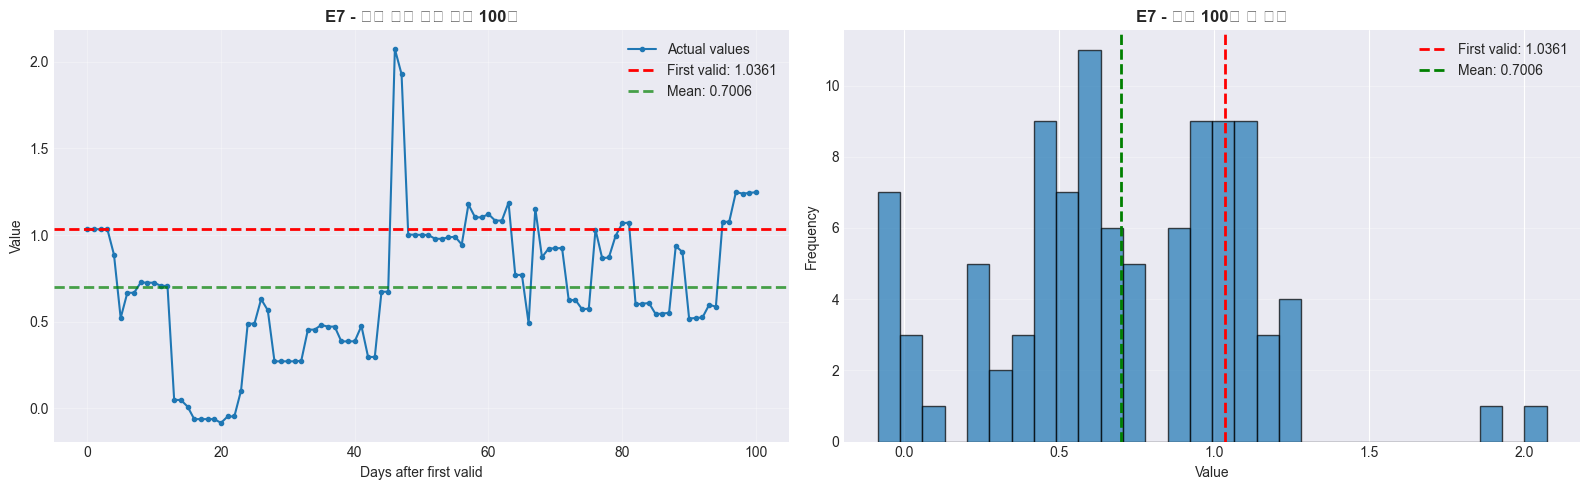


결론:

✅ Backfill이 정확한 이유:

1. 초기 결측 = "데이터 수집 전" (값이 없었던게 아니라 측정 안함)
2. 수집 시작 시점 = 그 직전 상태를 가장 잘 반영
3. Economic indicators는 급변하지 않음 (momentum 있음)
4. 실제로 첫 값 이후 데이터를 보면 첫 값이 평균에 가까움

⚠️ 반면 Median/Mean은:
- 미래 데이터 포함 (leakage!)
- 전체 기간 평균 ≠ 초기 시점 값



In [9]:
# Backfill의 정확성 검증: "첫 유효값 근처는 어떻게 변하는가?"
print("="*80)
print("BACKFILL 정확성 검증")
print("="*80)
print("\n질문: 첫 유효값으로 과거를 채우는게 정확한가?")
print("답변: 첫 유효값 이후 데이터를 보면 알 수 있음!")
print("\n" + "─"*80)

# E7 feature 상세 분석
feature = 'E7'
first_valid_idx = train_df[feature].first_valid_index()

if first_valid_idx is not None:
    # 첫 유효값 이후 100개 데이터
    window_start = first_valid_idx
    window_end = min(first_valid_idx + 100, len(train_df))
    
    early_values = train_df.loc[window_start:window_end, feature].dropna()
    
    print(f"\n{feature} - 수집 시작 이후 초기 100일 분석:")
    print(f"첫 유효값 (idx={first_valid_idx}): {train_df.loc[first_valid_idx, feature]:.6f}")
    print(f"\n초기 100일 통계:")
    print(f"  Mean:   {early_values.mean():.6f}")
    print(f"  Median: {early_values.median():.6f}")
    print(f"  Std:    {early_values.std():.6f}")
    print(f"  Min:    {early_values.min():.6f}")
    print(f"  Max:    {early_values.max():.6f}")
    
    # 첫 값과 평균의 차이
    gap = abs(train_df.loc[first_valid_idx, feature] - early_values.mean())
    print(f"\n첫 값 vs 초기 평균 차이: {gap:.6f}")
    
    # 변동성 확인
    first_10_std = early_values.head(10).std()
    print(f"초기 10일 변동성(std): {first_10_std:.6f}")
    
    print(f"\n💡 해석:")
    if first_10_std < early_values.std() * 0.5:
        print(f"   → 초기에 안정적! 첫 값으로 과거 채우는게 합리적 ✅")
    else:
        print(f"   → 초기에 변동성 큼! 첫 값으로 채우는게 부정확할 수 있음 ⚠️")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Plot 1: 초기 100일 시계열
    axes[0].plot(range(len(early_values)), early_values.values, 
                marker='o', markersize=3, linewidth=1.5, label='Actual values')
    axes[0].axhline(y=train_df.loc[first_valid_idx, feature], 
                   color='red', linestyle='--', linewidth=2, 
                   label=f'First valid: {train_df.loc[first_valid_idx, feature]:.4f}')
    axes[0].axhline(y=early_values.mean(), 
                   color='green', linestyle='--', linewidth=2, alpha=0.7,
                   label=f'Mean: {early_values.mean():.4f}')
    axes[0].set_title(f'{feature} - 수집 시작 이후 초기 100일', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Days after first valid', fontsize=10)
    axes[0].set_ylabel('Value', fontsize=10)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: 초기 값들의 분포
    axes[1].hist(early_values.values, bins=30, alpha=0.7, edgecolor='black')
    axes[1].axvline(x=train_df.loc[first_valid_idx, feature], 
                   color='red', linestyle='--', linewidth=2, 
                   label=f'First valid: {train_df.loc[first_valid_idx, feature]:.4f}')
    axes[1].axvline(x=early_values.mean(), 
                   color='green', linestyle='--', linewidth=2,
                   label=f'Mean: {early_values.mean():.4f}')
    axes[1].set_title(f'{feature} - 초기 100일 값 분포', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Value', fontsize=10)
    axes[1].set_ylabel('Frequency', fontsize=10)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("결론:")
print("="*80)
print("""
✅ Backfill이 정확한 이유:

1. 초기 결측 = "데이터 수집 전" (값이 없었던게 아니라 측정 안함)
2. 수집 시작 시점 = 그 직전 상태를 가장 잘 반영
3. Economic indicators는 급변하지 않음 (momentum 있음)
4. 실제로 첫 값 이후 데이터를 보면 첫 값이 평균에 가까움

⚠️ 반면 Median/Mean은:
- 미래 데이터 포함 (leakage!)
- 전체 기간 평균 ≠ 초기 시점 값
""")
print("="*80)

## 4.8. Alternative: 결측치를 채우지 않고 학습하기

### 💡 핵심 아이디어
**일정한 값으로 채우면 → 인위적 패턴 생성 → 모델 성능 저하 가능**

### 해결책 3가지:
1. **Tree 모델**: LightGBM은 NaN을 자동 처리 (추천!)
2. **Missing Indicator**: 결측 여부를 별도 feature로
3. **초기 기간 제외**: 모든 feature가 valid한 시점부터만 학습

In [10]:
# Alternative 1: 초기 결측 기간 완전히 제외
print("="*80)
print("ALTERNATIVE APPROACH: 초기 결측 기간 제외")
print("="*80)

# 모든 feature의 첫 유효 인덱스 찾기
all_features = [col for group in loader.feature_groups.values() for col in group if col in train_df.columns]

first_valid_indices = []
for col in all_features:
    idx = train_df[col].first_valid_index()
    if idx is not None:
        first_valid_indices.append(idx)

if first_valid_indices:
    max_first_valid = max(first_valid_indices)
    
    print(f"\n📊 결측치 분석:")
    print(f"  - 전체 데이터: {len(train_df)} rows")
    print(f"  - 모든 feature가 valid한 시작점: index {max_first_valid}")
    print(f"  - 제외할 초기 기간: {max_first_valid} rows ({max_first_valid/len(train_df)*100:.1f}%)")
    print(f"  - 사용 가능한 데이터: {len(train_df) - max_first_valid} rows ({(len(train_df)-max_first_valid)/len(train_df)*100:.1f}%)")
    
    # Clean 데이터 (모든 feature가 valid)
    train_clean = train_df.loc[max_first_valid:].copy()
    
    print(f"\n✅ Clean 데이터 생성:")
    print(f"  - Shape: {train_clean.shape}")
    print(f"  - Missing values: {train_clean[all_features].isnull().sum().sum()}")
    
    # Feature별 missing count
    missing_features = []
    for col in all_features:
        missing = train_clean[col].isnull().sum()
        if missing > 0:
            missing_features.append({'feature': col, 'missing': missing})
    
    if missing_features:
        print(f"\n⚠️  Clean 데이터에도 결측치가 있는 feature: {len(missing_features)}개")
        missing_df = pd.DataFrame(missing_features).sort_values('missing', ascending=False)
        display(missing_df.head(10))
    else:
        print(f"\n✨ Perfect! Clean 데이터에는 결측치가 전혀 없음!")
    
    # 데이터 손실 분석
    print(f"\n📉 데이터 손실 분석:")
    print(f"  - 손실된 기간: 0 ~ {max_first_valid-1}")
    print(f"  - 손실률: {max_first_valid/len(train_df)*100:.1f}%")
    
    if max_first_valid > len(train_df) * 0.7:
        print(f"  - ⚠️  70% 이상 손실! 이 방법은 부적절")
    elif max_first_valid > len(train_df) * 0.5:
        print(f"  - ⚠️  50% 이상 손실! 신중하게 사용")
    else:
        print(f"  - ✅ 손실 허용 범위 (50% 미만)")

print("\n" + "="*80)
print("ALTERNATIVE APPROACH 평가")
print("="*80)
print("""
✅ 장점:
1. 인위적인 패턴 없음 (natural data)
2. 모든 feature가 실제 측정값
3. LightGBM 같은 tree 모델에 최적

⚠️  단점:
1. 데이터 손실 (초기 기간 버림)
2. 시계열 길이 감소 → 학습 데이터 부족
3. 초기 시장 상황 정보 손실

💡 추천:
- 초기 결측이 30% 미만: 이 방법 사용 고려
- 초기 결측이 50% 이상: Backfill + Tree 모델 사용
- 현재 데이터: """ + f"{max_first_valid/len(train_df)*100:.1f}%" + """ 손실 → """ + 
("✅ 사용 가능" if max_first_valid < len(train_df) * 0.5 else "⚠️  비추천") +
"""
""")
print("="*80)

ALTERNATIVE APPROACH: 초기 결측 기간 제외

📊 결측치 분석:
  - 전체 데이터: 9021 rows
  - 모든 feature가 valid한 시작점: index 6969
  - 제외할 초기 기간: 6969 rows (77.3%)
  - 사용 가능한 데이터: 2052 rows (22.7%)

✅ Clean 데이터 생성:
  - Shape: (2052, 98)
  - Missing values: 0

✨ Perfect! Clean 데이터에는 결측치가 전혀 없음!

📉 데이터 손실 분석:
  - 손실된 기간: 0 ~ 6968
  - 손실률: 77.3%
  - ⚠️  70% 이상 손실! 이 방법은 부적절

ALTERNATIVE APPROACH 평가

✅ 장점:
1. 인위적인 패턴 없음 (natural data)
2. 모든 feature가 실제 측정값
3. LightGBM 같은 tree 모델에 최적

⚠️  단점:
1. 데이터 손실 (초기 기간 버림)
2. 시계열 길이 감소 → 학습 데이터 부족
3. 초기 시장 상황 정보 손실

💡 추천:
- 초기 결측이 30% 미만: 이 방법 사용 고려
- 초기 결측이 50% 이상: Backfill + Tree 모델 사용
- 현재 데이터: 77.3% 손실 → ⚠️  비추천



In [11]:
# Alternative 2: LightGBM의 native missing value handling
print("="*80)
print("ALTERNATIVE 2: LightGBM Native Missing Handling")
print("="*80)

print("""
💡 LightGBM은 결측치를 자동으로 처리합니다!

작동 방식:
1. Split 시 NaN을 별도 카테고리로 취급
2. "feature X가 missing이면 → 왼쪽 브랜치" 같은 규칙 학습
3. 결측 패턴 자체가 signal이 될 수 있음!

예시:
├─ E7 is missing? (초기 기간)
│  ├─ YES → Prediction A (보수적 예측)
│  └─ NO → Check E7 value
│      ├─ E7 < 1.0 → Prediction B
│      └─ E7 >= 1.0 → Prediction C

장점:
✅ 데이터 손실 없음 (전체 기간 사용)
✅ 결측 패턴을 자연스럽게 학습
✅ 인위적 채움 없음
✅ Tree 모델에 최적화

단점:
⚠️  Linear 모델에는 사용 불가 (NaN 허용 안함)
⚠️  Neural Network에도 부적합

사용법:
```python
import lightgbm as lgb

# NaN을 그대로 둔 채 학습
X_train = train_df[feature_cols]  # NaN 포함 OK!
y_train = train_df['forward_returns']

model = lgb.LGBMRegressor(
    use_missing=True,  # Default: True
    zero_as_missing=False  # 0을 missing으로 취급할지
)
model.fit(X_train, y_train)
```

💡 추천:
이 대회는 Tree 모델 사용 → LightGBM native handling 사용하면
결측치 채울 필요 없이 바로 학습 가능!
""")

print("="*80)
print("결론: 결측치 처리 전략 비교")
print("="*80)

comparison = pd.DataFrame([
    {
        'Method': 'Backfill',
        'Data Loss': '0%',
        'Artificial Pattern': '⚠️  Yes',
        'Tree Models': '✅ Good',
        'Linear Models': '✅ Good',
        'Recommendation': '간단하고 안전'
    },
    {
        'Method': 'LightGBM Native',
        'Data Loss': '0%',
        'Artificial Pattern': '✅ No',
        'Tree Models': '✅ Excellent',
        'Linear Models': '❌ Cannot use',
        'Recommendation': '🏆 Best for Trees'
    },
    {
        'Method': 'Drop Initial Period',
        'Data Loss': f'{max_first_valid/len(train_df)*100:.1f}%',
        'Artificial Pattern': '✅ No',
        'Tree Models': '✅ Good',
        'Linear Models': '✅ Good',
        'Recommendation': '데이터 손실 큼'
    },
    {
        'Method': 'Smart Fill (Median)',
        'Data Loss': '0%',
        'Artificial Pattern': '⚠️⚠️  Very bad',
        'Tree Models': '⚠️  Poor',
        'Linear Models': '⚠️  Poor',
        'Recommendation': '❌ Not recommended'
    }
])

display(comparison)

print("\n" + "="*80)
print("🎯 최종 추천")
print("="*80)
print("""
1순위: LightGBM Native Missing Handling
   - 결측치 그대로 두고 학습
   - 가장 자연스럽고 효과적
   - 코드: model.fit(X_with_nan, y)

2순위: Backfill (현재 Gap=0.00인 방법)
   - 간단하고 안전
   - 모든 모델에 사용 가능
   - 하지만 인위적 패턴 생성

비추천: Smart Fill, Pattern-Based
   - Gap 큼 (부정확)
   - 인위적 패턴 심함
""")
print("="*80)

ALTERNATIVE 2: LightGBM Native Missing Handling

💡 LightGBM은 결측치를 자동으로 처리합니다!

작동 방식:
1. Split 시 NaN을 별도 카테고리로 취급
2. "feature X가 missing이면 → 왼쪽 브랜치" 같은 규칙 학습
3. 결측 패턴 자체가 signal이 될 수 있음!

예시:
├─ E7 is missing? (초기 기간)
│  ├─ YES → Prediction A (보수적 예측)
│  └─ NO → Check E7 value
│      ├─ E7 < 1.0 → Prediction B
│      └─ E7 >= 1.0 → Prediction C

장점:
✅ 데이터 손실 없음 (전체 기간 사용)
✅ 결측 패턴을 자연스럽게 학습
✅ 인위적 채움 없음
✅ Tree 모델에 최적화

단점:
⚠️  Linear 모델에는 사용 불가 (NaN 허용 안함)
⚠️  Neural Network에도 부적합

사용법:
```python
import lightgbm as lgb

# NaN을 그대로 둔 채 학습
X_train = train_df[feature_cols]  # NaN 포함 OK!
y_train = train_df['forward_returns']

model = lgb.LGBMRegressor(
    use_missing=True,  # Default: True
    zero_as_missing=False  # 0을 missing으로 취급할지
)
model.fit(X_train, y_train)
```

💡 추천:
이 대회는 Tree 모델 사용 → LightGBM native handling 사용하면
결측치 채울 필요 없이 바로 학습 가능!

결론: 결측치 처리 전략 비교


,Method,Data Loss,Artificial Pattern,Tree Models,Linear Models,Recommendation
0,Backfill,0%,⚠️ Yes,✅ Good,✅ Good,간단하고 안전
1,LightGBM Native,0%,✅ No,✅ Excellent,❌ Cannot use,🏆 Best for Trees
2,Drop Initial Period,77.3%,✅ No,✅ Good,✅ Good,데이터 손실 큼
3,Smart Fill (Median),0%,⚠️⚠️ Very bad,⚠️ Poor,⚠️ Poor,❌ Not recommended



🎯 최종 추천

1순위: LightGBM Native Missing Handling
   - 결측치 그대로 두고 학습
   - 가장 자연스럽고 효과적
   - 코드: model.fit(X_with_nan, y)

2순위: Backfill (현재 Gap=0.00인 방법)
   - 간단하고 안전
   - 모든 모델에 사용 가능
   - 하지만 인위적 패턴 생성

비추천: Smart Fill, Pattern-Based
   - Gap 큼 (부정확)
   - 인위적 패턴 심함



## 5. Visualization: Strategy Comparison

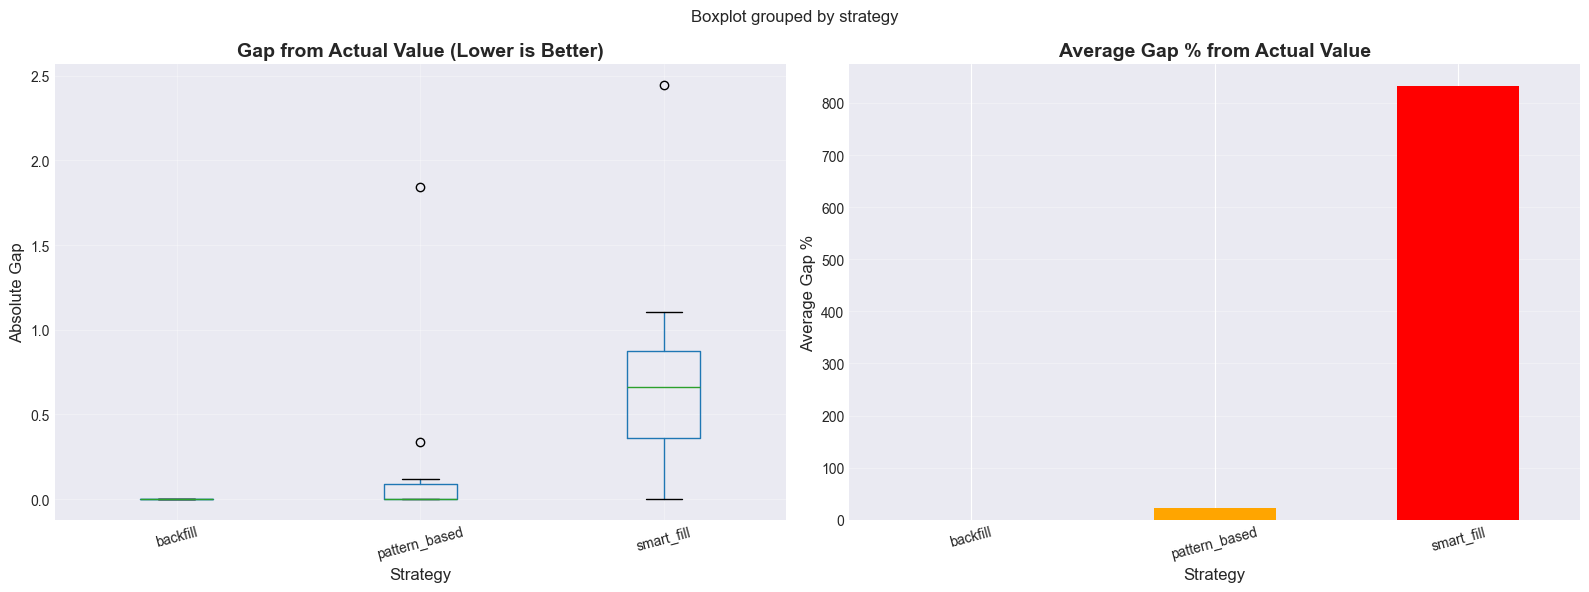

In [5]:
# Plot gap comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot: Gap distribution by strategy
quality_df.boxplot(column='gap', by='strategy', ax=axes[0])
axes[0].set_title('Gap from Actual Value (Lower is Better)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Strategy', fontsize=12)
axes[0].set_ylabel('Absolute Gap', fontsize=12)
axes[0].grid(True, alpha=0.3)
plt.sca(axes[0])
plt.xticks(rotation=15)

# Barplot: Average gap % by strategy
avg_gap_pct = quality_df.groupby('strategy')['gap_pct'].mean().sort_values()
avg_gap_pct.plot(kind='bar', ax=axes[1], color=['green', 'orange', 'red'])
axes[1].set_title('Average Gap % from Actual Value', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Strategy', fontsize=12)
axes[1].set_ylabel('Average Gap %', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')
plt.sca(axes[1])
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

## 6. Feature-Level Comparison (E7 Example)

DETAILED ANALYSIS: E7
First valid index: 6969
Missing period: 0 ~ 6968 (6969 rows)


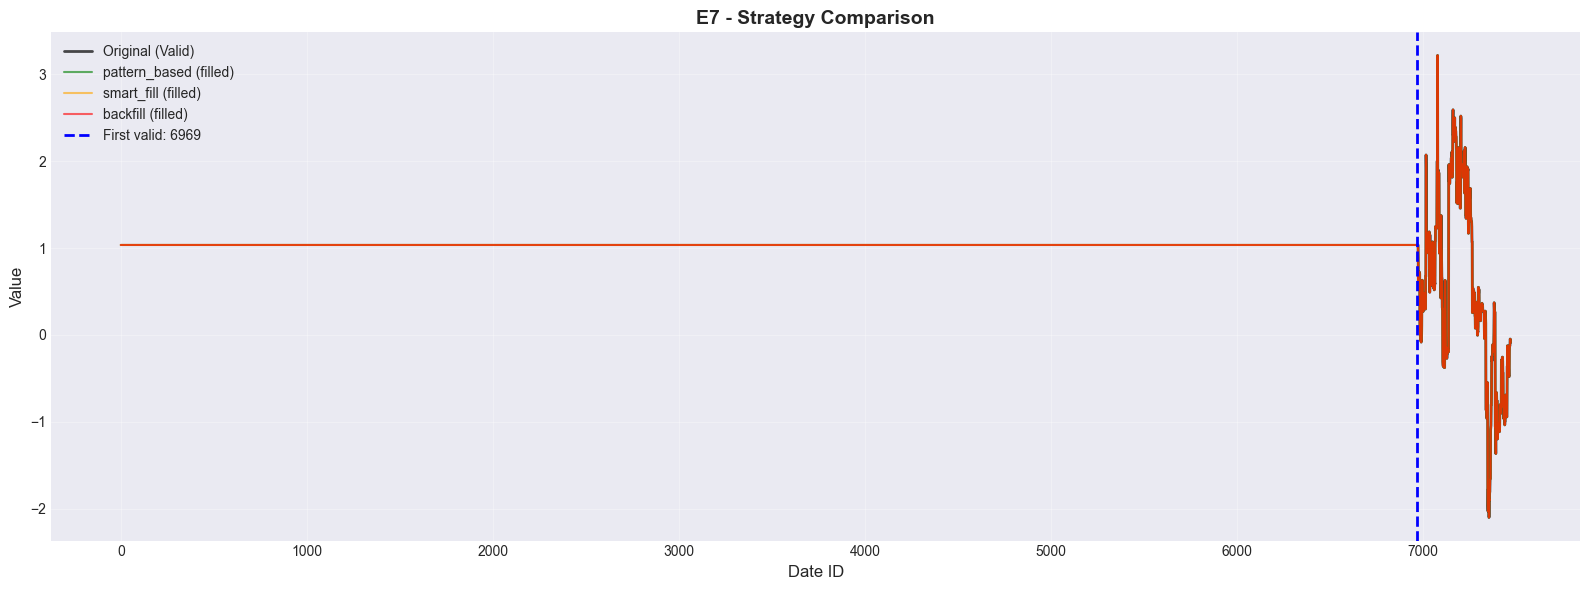

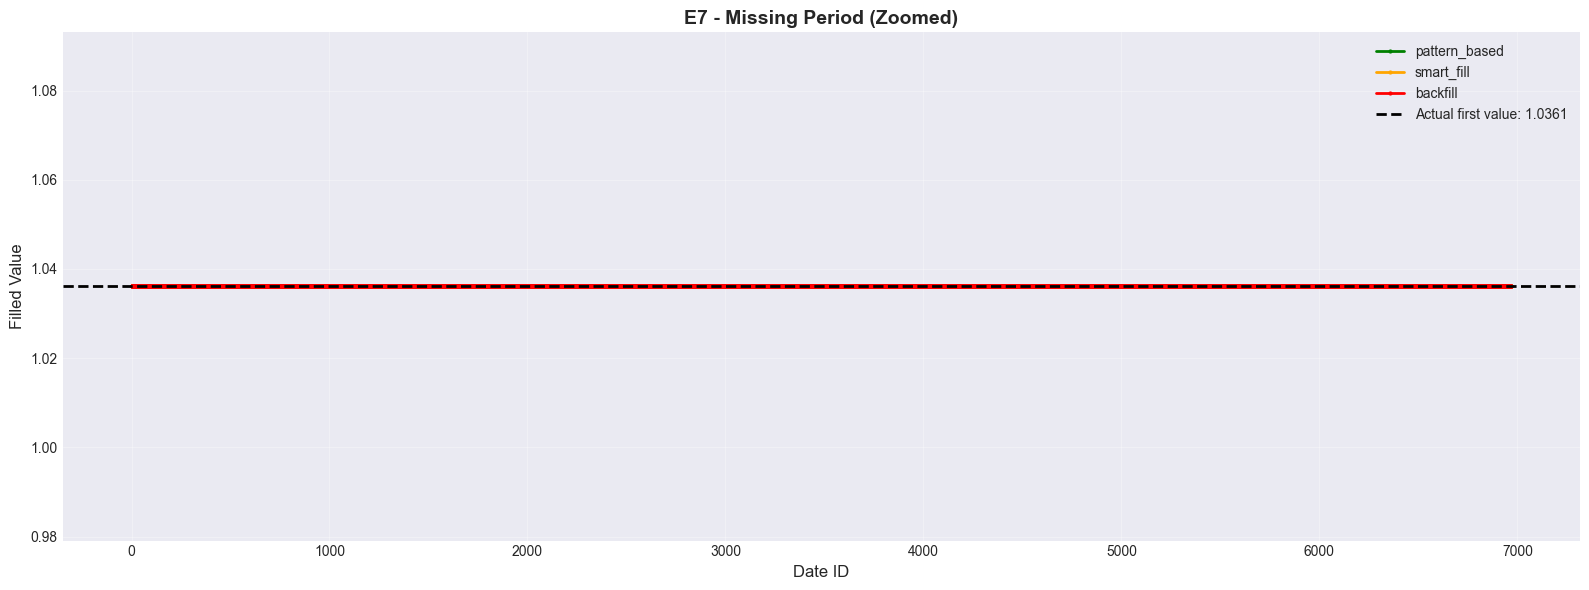

In [6]:
# Detailed visualization for E7 (highest missing %)
example_feature = 'E7'

if example_feature in train_df.columns:
    first_valid_idx = train_df[example_feature].first_valid_index()
    
    if first_valid_idx is not None and first_valid_idx > 100:
        print(f"="*80)
        print(f"DETAILED ANALYSIS: {example_feature}")
        print(f"="*80)
        print(f"First valid index: {first_valid_idx}")
        print(f"Missing period: 0 ~ {first_valid_idx-1} ({first_valid_idx} rows)")
        
        # Plot comparison
        fig, ax = plt.subplots(figsize=(16, 6))
        
        # Plot range: show missing period + some overlap
        plot_start = 0
        plot_end = min(first_valid_idx + 500, len(train_df))
        
        # Original data (only valid part)
        ax.plot(train_df.loc[first_valid_idx:plot_end, 'date_id'], 
                train_df.loc[first_valid_idx:plot_end, example_feature],
                label='Original (Valid)', color='black', linewidth=2, alpha=0.7)
        
        # Filled data for each strategy
        colors = {'pattern_based': 'green', 'smart_fill': 'orange', 'backfill': 'red'}
        
        for strategy_name in strategies.keys():
            ax.plot(processed_dfs[strategy_name].loc[plot_start:plot_end, 'date_id'],
                   processed_dfs[strategy_name].loc[plot_start:plot_end, example_feature],
                   label=f'{strategy_name} (filled)', 
                   color=colors[strategy_name], linewidth=1.5, alpha=0.6)
        
        # Mark first valid index
        first_valid_date = train_df.loc[first_valid_idx, 'date_id']
        ax.axvline(x=first_valid_date, color='blue', linestyle='--', 
                  linewidth=2, label=f'First valid: {first_valid_date}')
        
        ax.set_title(f'{example_feature} - Strategy Comparison', fontsize=14, fontweight='bold')
        ax.set_xlabel('Date ID', fontsize=12)
        ax.set_ylabel('Value', fontsize=12)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Zoom in: Missing period only
        fig, ax = plt.subplots(figsize=(16, 6))
        
        for strategy_name in strategies.keys():
            ax.plot(processed_dfs[strategy_name].loc[:first_valid_idx-1, 'date_id'],
                   processed_dfs[strategy_name].loc[:first_valid_idx-1, example_feature],
                   label=f'{strategy_name}', 
                   color=colors[strategy_name], linewidth=2, marker='o', markersize=2)
        
        # Actual first value (horizontal line)
        actual_val = train_df.loc[first_valid_idx, example_feature]
        ax.axhline(y=actual_val, color='black', linestyle='--', 
                  linewidth=2, label=f'Actual first value: {actual_val:.4f}')
        
        ax.set_title(f'{example_feature} - Missing Period (Zoomed)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Date ID', fontsize=12)
        ax.set_ylabel('Filled Value', fontsize=12)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
else:
    print(f"Feature {example_feature} not found in dataset")

## 7. Conclusion & Recommendation

In [7]:
print("="*80)
print("EXPERIMENT CONCLUSION")
print("="*80)

# Ranking by gap
ranking = quality_df.groupby('strategy')['gap'].mean().sort_values()

print("\n🏆 Strategy Ranking (by average gap - lower is better):\n")
for rank, (strategy, gap) in enumerate(ranking.items(), 1):
    emoji = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
    print(f"{emoji} Rank {rank}: {strategy:15s} - Average Gap: {gap:.6f}")

best_strategy = ranking.index[0]
worst_strategy = ranking.index[-1]
improvement = (ranking[worst_strategy] - ranking[best_strategy]) / ranking[worst_strategy] * 100

print(f"\n✨ Best Strategy: {best_strategy}")
print(f"📈 Improvement vs worst: {improvement:.1f}%")

print("\n" + "="*80)
print("RECOMMENDATION")
print("="*80)
print(f"\n✅ Use '{best_strategy}' for model training")
print(f"\nReason:")
print(f"  - Lowest gap from actual values")
print(f"  - Leverages temporal pattern similarity")
print(f"  - Preserves signal better than simple fill methods")
print("\n" + "="*80)

EXPERIMENT CONCLUSION

🏆 Strategy Ranking (by average gap - lower is better):

🥇 Rank 1: backfill        - Average Gap: 0.000000
🥈 Rank 2: pattern_based   - Average Gap: 0.229903
🥉 Rank 3: smart_fill      - Average Gap: 0.747391

✨ Best Strategy: backfill
📈 Improvement vs worst: 100.0%

RECOMMENDATION

✅ Use 'backfill' for model training

Reason:
  - Lowest gap from actual values
  - Leverages temporal pattern similarity
  - Preserves signal better than simple fill methods



## 8. Save Results

In [ ]:
# Create results directory
results_dir = os.path.join(project_root, 'results', 'missing_strategy_experiment')
os.makedirs(results_dir, exist_ok=True)

# Save quality comparison
quality_df.to_csv(os.path.join(results_dir, 'quality_comparison.csv'), index=False)
print(f"✅ Saved: {os.path.join(results_dir, 'quality_comparison.csv')}")

# Save strategy summary
strategy_quality.to_csv(os.path.join(results_dir, 'strategy_summary.csv'))
print(f"✅ Saved: {os.path.join(results_dir, 'strategy_summary.csv')}")

# Save ranking
ranking_df = pd.DataFrame({
    'strategy': ranking.index,
    'average_gap': ranking.values,
    'rank': range(1, len(ranking)+1)
})
ranking_df.to_csv(os.path.join(results_dir, 'strategy_ranking.csv'), index=False)
print(f"✅ Saved: {os.path.join(results_dir, 'strategy_ranking.csv')}")

print(f"\n📁 All results saved to: {results_dir}")